### Моделирование задачи **SIR** 

**S** -- susceptible individuals  
**I** -- infected individuals  
**R** -- recovered individuals  
**N** -- population size  
**betta** -- заразность  
**gamma** -- смертность  

In [8]:
!pip install --user matplotlib

In [9]:
import matplotlib
import numpy
import math

In [28]:
S = [900]
I = [100]
N = 1000
betta = 0.4
gamma = 0.04

h = 1
n = 100

In [29]:
def genData(S, I, N, betta, gamma, n):
    S = S[::]
    I = I[::]
    R = []
    R.append(N - S[0] - I[0])
    for i in range(1, n):
        S.append(max(0, int(
            S[i-1] - betta*S[i-1]*I[i-1]*h/N)))
        I.append(max(0, int(
            I[i-1] + h*(betta*S[i-1]*I[i-1]/N - gamma*I[i-1]))))
        R.append(N-I[i]-S[i])
    return (S, I, R)


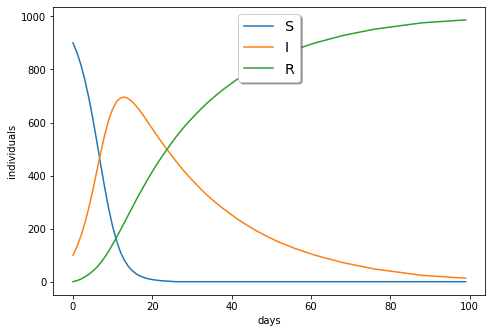

In [30]:
%matplotlib inline

x = range(n)
y1, y2, y3 = genData(S, I, N, betta, gamma, n)

artist = matplotlib.pyplot.figure()
ax = artist.add_axes([0,0,1,1])
ax.set_xlabel("days")
ax.set_ylabel("individuals")

ax.plot(x, y1, label='S')
ax.plot(x, y2, label='I')
ax.plot(x, y3, label='R')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# legend.get_frame().set_facecolor('C0')

matplotlib.pyplot.show()